EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Credit_card_dataset.csv")

In [3]:
data.shape

(8950, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [5]:
data.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [6]:
data.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [7]:
data.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


In [8]:
data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mode()[0],inplace=True)

In [9]:
data.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         0
CASH_ADVANCE         0
dtype: int64

DATA VISUALIZATION

<Axes: xlabel='PURCHASES', ylabel='PAYMENTS'>

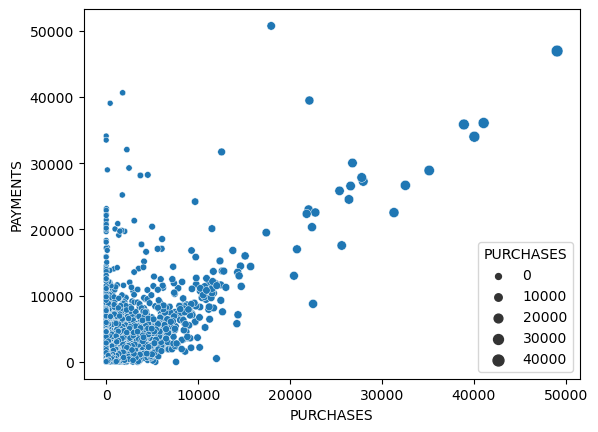

In [10]:
sns.scatterplot(x='PURCHASES',y='PAYMENTS',data=data,size='PURCHASES')	

C:\Users\ines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

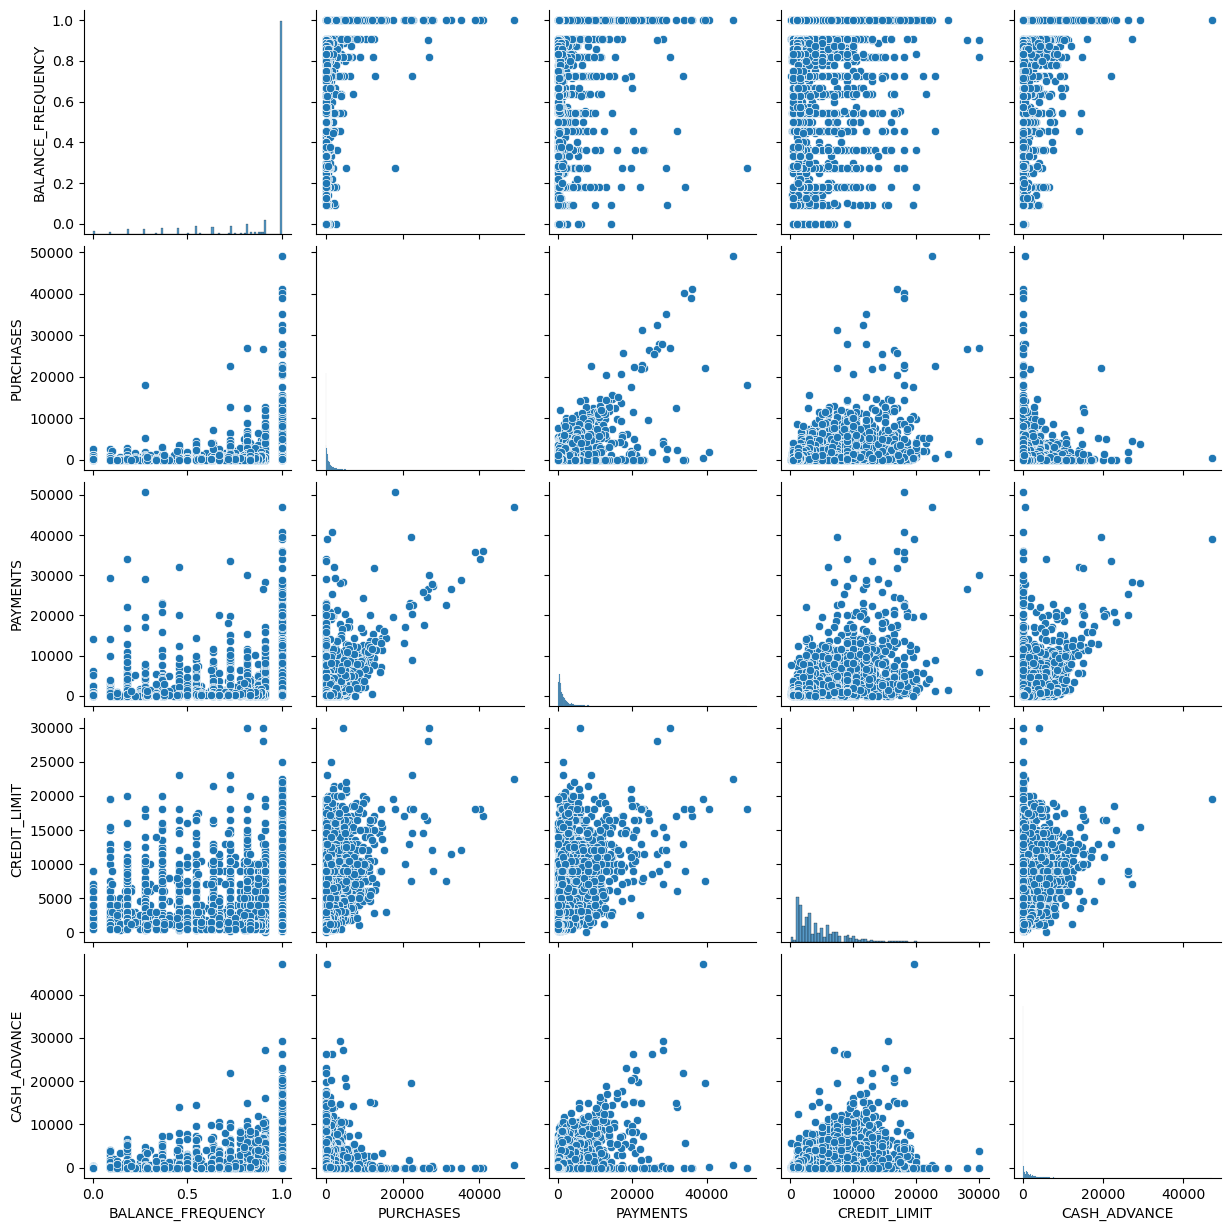

In [11]:
sns.pairplot(data)
plt.show()

<Axes: >

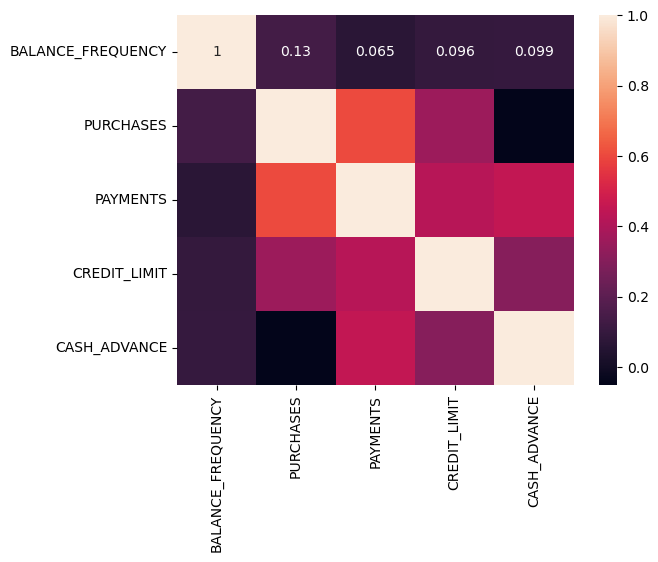

In [12]:

sns.heatmap(data.iloc[:,1:].corr(),annot=True)

<Axes: ylabel='PURCHASES'>

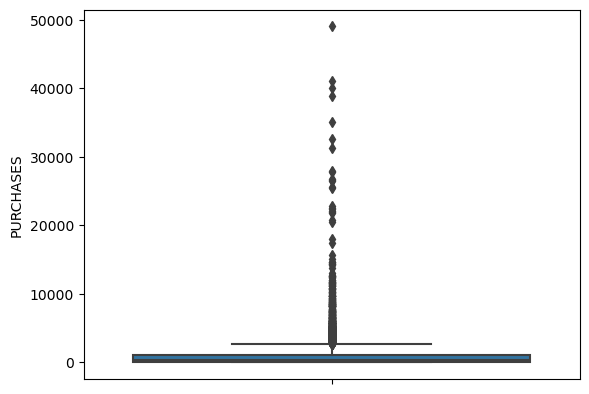

In [13]:
sns.boxplot(y="PURCHASES",data=data)

<Axes: ylabel='CREDIT_LIMIT'>

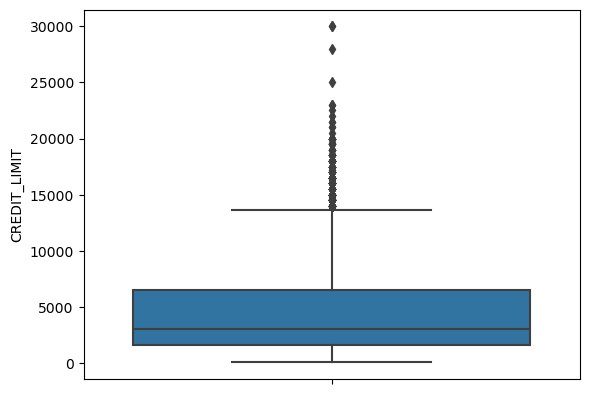

In [14]:
sns.boxplot(y="CREDIT_LIMIT",data=data)

In [15]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [16]:
outliers = find_outliers_IQR(data["PURCHASES"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 808
max outlier value: 49039.57
min outlier value: 2720.68


6       7091.01
12      3217.99
21      6359.95
23      4248.35
30      3038.01
         ...   
8689    8053.95
8737    5633.83
8748    3950.00
8758    2918.08
8897    2806.78
Name: PURCHASES, Length: 808, dtype: float64

In [17]:
outliers = find_outliers_IQR(data["CREDIT_LIMIT"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 248
max outlier value: 30000.0
min outlier value: 14000.0


85      16500.0
120     17000.0
124     19000.0
128     17000.0
136     17000.0
         ...   
6629    18000.0
7046    30000.0
7764    14500.0
7962    17500.0
8229    14000.0
Name: CREDIT_LIMIT, Length: 248, dtype: float64

In [18]:
per_out_pur=(808/8950)*100
per_out_pur   

9.027932960893855

In [19]:
per_out_cred=(248/8950)*100
per_out_cred


2.7709497206703912

In [20]:
upper_limit = data["PURCHASES"].mean() + 3*data["PURCHASES"].std()

print(upper_limit)

lower_limit = data["PURCHASES"].mean() - 3*data["PURCHASES"].std()

print(lower_limit)

7413.1091791380795
-5406.699512098973


In [21]:
 data["PURCHASES"]= np.where(data["PURCHASES"] > upper_limit, upper_limit, np.where(data["PURCHASES"] < lower_limit,lower_limit,data["PURCHASES"]))

In [22]:
data.describe()["PURCHASES"]

count    8950.000000
mean      916.540568
std      1428.984494
min         0.000000
25%        39.635000
50%       361.280000
75%      1110.130000
max      7413.109179
Name: PURCHASES, dtype: float64

In [23]:
upper_limit_c = data["CREDIT_LIMIT"].mean() + 3*data["CREDIT_LIMIT"].std()

print(upper_limit_c)

lower_limit_c = data["CREDIT_LIMIT"].mean() - 3*data["CREDIT_LIMIT"].std()

print(lower_limit_c)

15410.222577666978
-6421.657632122175


In [24]:
 data["CREDIT_LIMIT"]= np.where(data["CREDIT_LIMIT"] > upper_limit, upper_limit, np.where(data["CREDIT_LIMIT"] < lower_limit,lower_limit,data["CREDIT_LIMIT"]))

In [25]:
data.describe()["CREDIT_LIMIT"]

count    8950.000000
mean     3895.821777
std      2387.536079
min        50.000000
25%      1600.000000
50%      3000.000000
75%      6500.000000
max      7413.109179
Name: CREDIT_LIMIT, dtype: float64

APPLYING MACHINE LEARNING MODELS

In [26]:
data1=data.drop(columns="CUST_ID")
x=data1[["PURCHASES","CREDIT_LIMIT"]]


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
"""scaler.fit(x)

scaled_data = pd.DataFrame(scaler.transform(x),columns=x.columns )"""




'scaler.fit(x)\n\nscaled_data = pd.DataFrame(scaler.transform(x),columns=x.columns )'

HIERARCHICAL CLUSTERING (AGGLOMERATIVE)

In [28]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=5,affinity="euclidean" ,linkage="complete")
clusters=agg.fit_predict(x)
clusters_df=pd.DataFrame(clusters)
clusters_df.value_counts()

C:\Users\ines\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


3    4759
4    2806
1     696
2     396
0     293
Name: count, dtype: int64

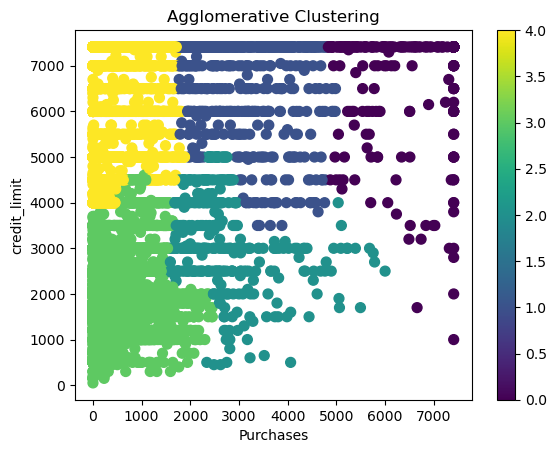

In [29]:
fig =plt.figure()
ax = fig.add_subplot(1,1,1)
scatter = ax.scatter (data1["PURCHASES"],data1["CREDIT_LIMIT"],c=clusters_df[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("Purchases")
ax.set_ylabel("credit_limit")
plt.colorbar(scatter)

The agglomerative clustering model give as result five clusters . We will see in the next step the dendogram of these features.

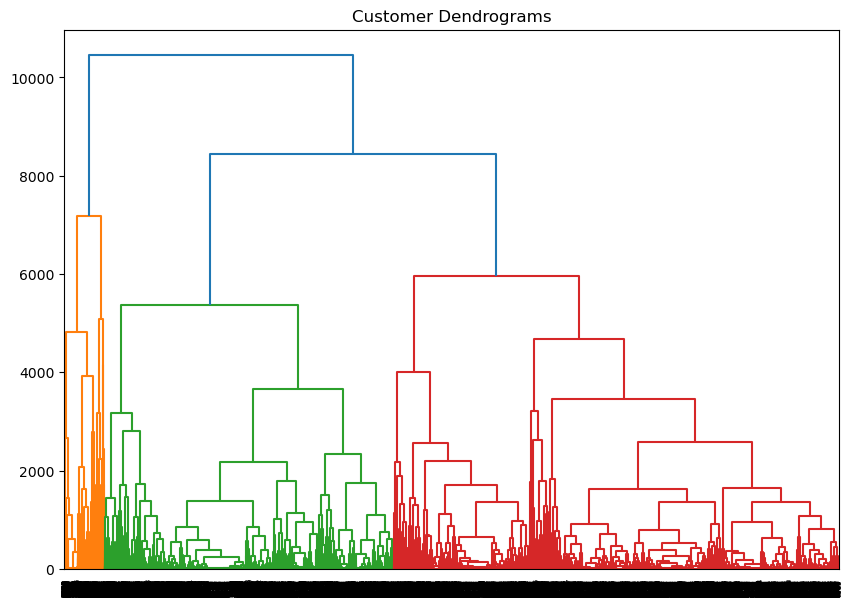

In [30]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data1[["PURCHASES","CREDIT_LIMIT"]], method="complete"))

K-MEANS

No we will use another method of clustering which is the K-means. To find the right value of K, we wil use the elbow diagram and the silhouette_score.

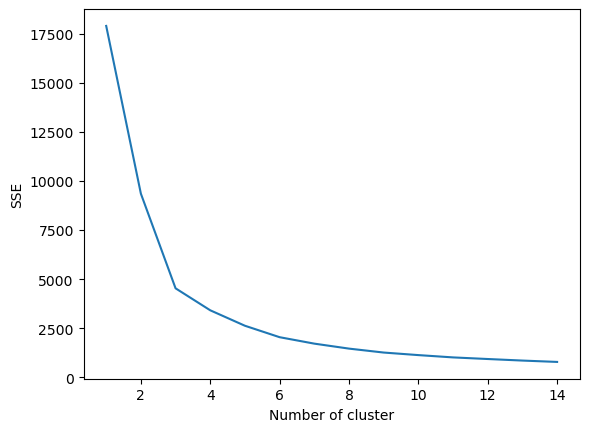

In [31]:
from sklearn.cluster import KMeans
sse = {}

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000, n_init = 10).fit(x)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

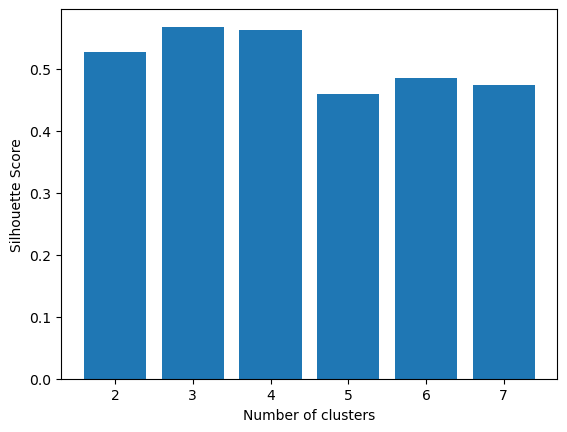

In [32]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append(
        silhouette_score(x, KMeans(n_clusters = n_cluster, n_init = 10).fit_predict(x)))

# Plotting a bar graph to compare the results
k = [2, 3, 4, 5, 6,7]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.show()

We can conclude that K=3 is the most convinient value.

In [33]:
kmean= KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0)
kmean.fit(x)
labels=kmean.labels_
#labels=kmean.fit_predict(x)

In [34]:
data["Cluster_id"]=labels
data.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE,Cluster_id
0,C10001,0.818182,95.40,201.802084,1000.000000,0.000000,1
1,C10002,0.909091,0.00,4103.032597,7000.000000,6442.945483,0
2,C10003,1.000000,773.17,622.066742,7413.109179,0.000000,0
3,C10004,0.636364,1499.00,0.000000,7413.109179,205.788017,0
4,C10005,1.000000,16.00,678.334763,1200.000000,0.000000,1


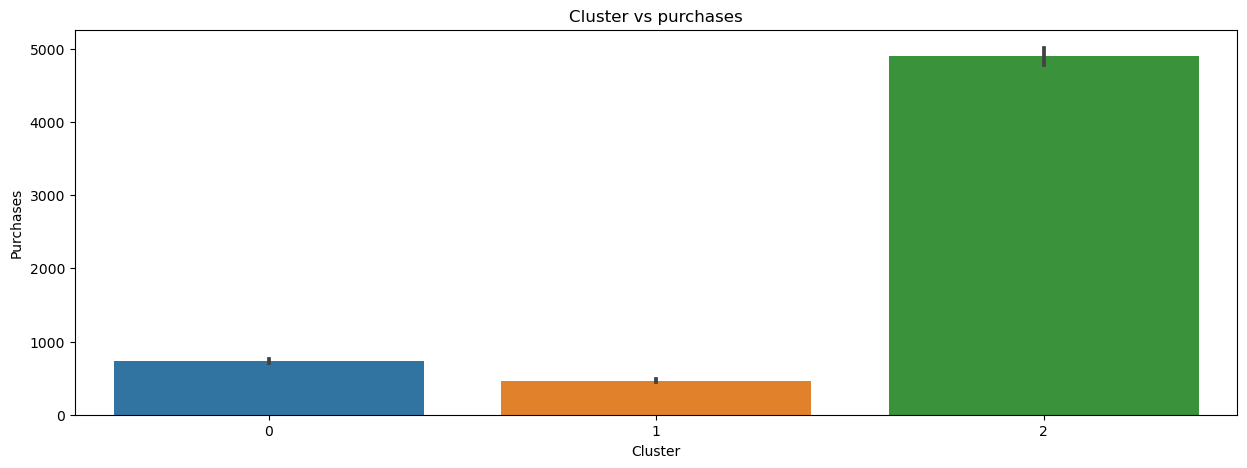

In [35]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cluster_id',y='PURCHASES',data=data)
plt.title('Cluster vs purchases')
plt.xlabel('Cluster')
plt.ylabel('Purchases')
plt.show()


In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cluster_id',y='CREDIT_LIMIT',data=data)
plt.title('Cluster vs credit_limit')
plt.xlabel('Cluster')
plt.ylabel('Credit_limit')
plt.show()


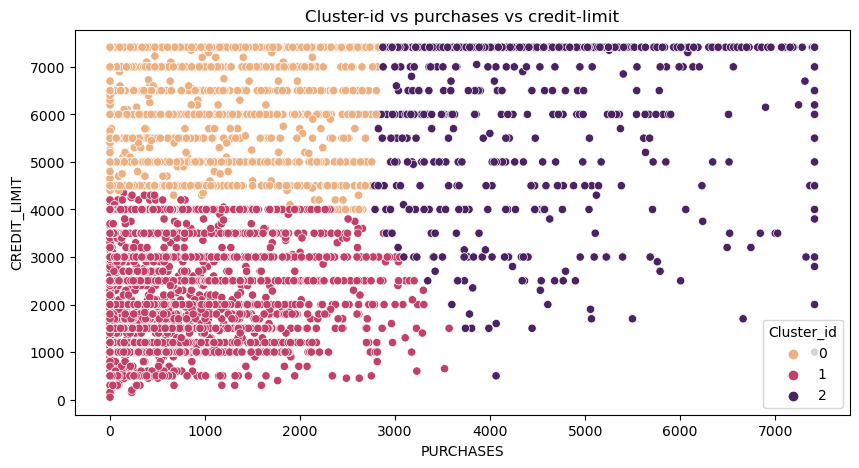

In [37]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='PURCHASES',y='CREDIT_LIMIT',hue='Cluster_id',palette='flare',data=data)
plt.title('Cluster-id vs purchases vs credit-limit')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.show()